<a href="https://colab.research.google.com/github/KevinLopess/sistemas_inteligentes/blob/main/Trab5_SistemasInteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download fedesoriano/stroke-prediction-dataset
! unzip stroke-prediction-dataset.zip
from numpy import genfromtxt
dataset = genfromtxt('healthcare-dataset-stroke-data.csv', delimiter=',' , skip_header=1 ,usecols=(-4,-10,-3))
dataset[np.isnan(dataset)] = 35
print(dataset[:10,:])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 30.6MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  
[[228.69  67.    36.6 ]
 [202.21  61.    35.  ]
 [105.92  80.    32.5 ]
 [171.23  49.    34.4 ]
 [174.12  79.    24.  ]
 [186.21  81.    29.  ]
 [ 70.09  74.    27.4 ]
 [ 94.39  69.    22.8 ]
 [ 76.15  59.    35.  ]
 [ 58.57  78.    24.2 ]]


In [ ]:
i = 0
y = dataset[:,2]
w=np.zeros((10,4))
w_hist=np.zeros((10,4))
for j in range (0,10):
  MSE_ant = 10000000000
  for i in range (0,10):
    w1 = np.random.randn();
    w2 = np.random.randn();
    w3 = np.random.randn();
    y_pred = w1*dataset[:,0] + w2*dataset[:,1] - w3;
    MSE = mean_squared_error(y,y_pred);
    w_hist[j][0] = w1
    w_hist[j][1] = w2
    w_hist[j][2] = w3
    w_hist[j][3] = MSE
    if MSE < MSE_ant:
      x1_usavel = w1
      x2_usavel = w2
      x3_usavel = w3
      MSE_ant = MSE
  w[j][0]=x1_usavel
  w[j][1]=x2_usavel
  w[j][2]=x3_usavel
  w[j][3]=MSE_ant
  print('Particula',j)
  print('w1:',x1_usavel)
  print('w2:',x2_usavel)
  print('w3:',x3_usavel)
  print('Menor MSE (pBest):',MSE_ant)
df = pd.DataFrame(w, index = ['0', '1', '2', '3', '4','5','6','7','8','9'],
                    columns = ['0', '1', '2','3'])
minvalue = df['3'].min()
minvalueIndexLabel = df['3'].idxmin()
ind = int(minvalueIndexLabel)
print('-----------')
print('w1:',w[ind][0])
print('w2:',w[ind][1])
print('w3:',w[ind][2])
print('Menor MSE (gBest):',minvalue)
print('gBest está na linha:',ind)

Particula 0
w1: 0.44451996750669676
w2: 0.0950282338786911
w3: 0.42542045929260697
Menor MSE (pBest): 895.4740890504723
Particula 1
w1: 0.17543441934665616
w2: 0.39237840839448374
w3: 1.7475910938642247
Menor MSE (pBest): 189.59570660814776
Particula 2
w1: -0.14365170171263789
w2: 0.9174549166148775
w3: -0.03415790903564872
Menor MSE (pBest): 401.33704583202945
Particula 3
w1: 0.10354119706220521
w2: 0.2838719990188432
w3: -0.4730071573903099
Menor MSE (pBest): 120.70381215950347
Particula 4
w1: 0.029697897777755375
w2: 0.8974985340854487
w3: 1.45900728156553
Menor MSE (pBest): 506.8003718098179
Particula 5
w1: 0.17843432510104174
w2: -0.038809479446325526
w3: 0.9479391278666953
Menor MSE (pBest): 269.4570375435631
Particula 6
w1: -0.2126787825130068
w2: 0.5920607640349921
w3: -0.6727674125579092
Menor MSE (pBest): 875.9885823400567
Particula 7
w1: -0.4282203742572377
w2: 1.2221065508337479
w3: -2.6873376268241222
Menor MSE (pBest): 1219.500575764603
Particula 8
w1: 0.5035125873286423


In [ ]:
v = 0
for k in range (0,10):
  v = v + (w[k]-w_hist[k])+(w[ind]-w_hist[k])
  p = v + p

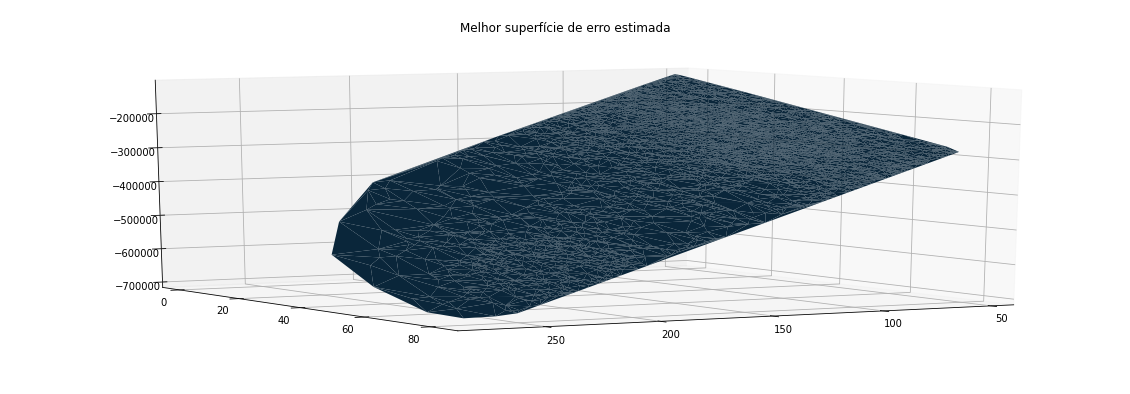

In [ ]:
y_pred = p[9][0]*dataset[:,0] + p[9][1]*dataset[:,1] - p[9][2];
# BLOCO DA SUPERFICIE COM MELHOR ERRO

fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(dataset[:,0], dataset[:,1], y_pred)

ax.view_init(elev=10, azim=-300)
plt.title ('Melhor superfície de erro estimada')
plt.show()

In [ ]:
points2D = np.vstack([dataset[:,0],dataset[:,1]]).T
from scipy.spatial import Delaunay

tri = Delaunay(points2D)
simplices = tri.simplices

import plotly.figure_factory as ff

fig = ff.create_trisurf(dataset[:,0], dataset[:,1], y_pred, simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3),title='Melhor superfície de erro estimada')
fig.show()